In [1]:
from util import *

In [2]:

cutoff = 1.3# cutoff for particles being 'close' to each other (~ first min of g(r))
rho = 1.4                       # number density for periodic boundaries
numFrames = 1000# number of frames
path = "/Users/francesco/Downloads/T0.48_N10002_NVT_step_2000LJ_startFrame125.xyz"# path to input file

partType = 0 # type of particles to compute: 0: all particles, 'A': type A particle: 'B': type B particles
if partType == '0':
    numPart = 10002
    partLabel = ['A','B'] # for loading coordinates of A and B particles
elif partType =='A': 
    numPart = 6668
    partLabel = ['A','A']
else: 
    numPart = 3334
    partLabel = ['B','B']
side  = (numPart / rho)**(1/3)	# box length
numFast = int(numPart*0.1)	# number of particles that are considered 'fast'


In [3]:

allCoords = readCoords(path,numFrames,numPart,partLabel)
 

length of trajectory section delta is 100 frames
Fast particles with previous fast neighbours: 0.76 percent
Fast particles with previous selection of random neighbours: 0.68 percent


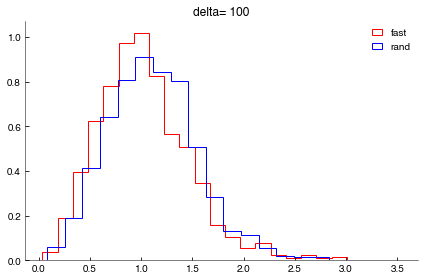

In [8]:
   
for delta in [100]:
    pl.figure()
    print('length of trajectory section delta is %.3d frames'%(delta))
    fastPart = selectFast(allCoords,delta,numFast,numFrames,side,numPart) # select all fast particles for all frames
    randPart = selectRand(allCoords,delta,numFast,numFrames,fastPart,numPart,francesco=False) # randomly select particles that are not fast for each frame
    minDistsFast = np.array(distFast(fastPart,fastPart, allCoords,delta, side))
    minDistsRand = np.array(distFast(fastPart,randPart, allCoords,delta, side)) # Calculate distance between particles in different frames
    pl.hist(minDistsFast,bins = 20,density = True,histtype = 'step', color = 'red',label = 'fast')	#plot distribution of minimum distance
    pl.hist(minDistsRand,bins = 20,density= True,histtype = 'step', color = 'blue', label  = 'rand')
    pl.legend(frameon=False)
    pl.title('delta= '+str(delta))
    print('Fast particles with previous fast neighbours: %.2f percent'%(len(minDistsFast[minDistsFast<cutoff])/len(minDistsFast)))#compute ratio of close particles
    print('Fast particles with previous selection of random neighbours: %.2f percent'%(len(minDistsRand[minDistsRand<cutoff])/len(minDistsRand)))#compute ratio of close particles
pl.show()

My understanding is the following:
- `fastPart` is a list of arrays. Every array has the ID of fast fast particles at a given frame
- `randPart` is a list of arrays. Every array has a random selection of ids. I would expect it to contain the same number of ids per arrays, but it doesn't.


In [9]:
for f,r in zip(fastPart, randPart):
    print(len(f),len(r))

333 305
333 299
333 285
333 269
333 249
333 258
333 253
333 192
333 185


- `minDistsFast` is an array. For every frame>0 and every fast paticle in the frame, the distance between a fast particles and all fast particles (exlcuding itself) of the previous frame is computed and the minimum is stored.
- `minDistsRand` is an array. For every frame>0 and every fast paticle in the frame, the distance between a fast particles and all randomly selected particles (exlcuding itself) of the previous frame is computed and the minimum is stored.
- In the end, for the two set of distances, the relative fraction of distances smaller than a cutoff is computed.

What do we really expect to measure? It seems that the code performs a measure of persistence of the fast labels (an easier way could have been to coarse grain with histogramdd...). Supposedly, if fast regions "diffuse" over time, the number of neighbouring fast particles should be larger than the number of random neighbours. The results however do not show much.

In [19]:
fastPart

[array([ 629, 1290, 1595, 1344, 2479,  233, 2980,  282, 1327, 1289,  643,
         908,  501, 2379, 2167, 3145, 1835, 1497, 2819, 3271,    4, 2501,
        2110, 2276, 2911,  453, 3223,  981, 2012,  583,  654, 2254, 2475,
        1422, 1107, 3197, 1834, 3081,  539, 2046, 1105,  228, 1340, 1382,
        1310, 1716, 2174, 1657, 2272, 3103, 2137,   95,  540, 1166, 2160,
         749, 2758,  389, 1458, 1646,  477, 1007, 1318, 2305,  556, 1625,
         681, 1947,   17, 1248, 1860,  159, 1548,   89,  384, 1518,  418,
        2458,  249, 2566, 1696, 1074, 2588, 2670, 1098, 3333, 3244, 1037,
        1916, 3093, 2812, 2534, 1457, 2567,  513, 1466, 2173, 1903, 2144,
        1123, 1542, 1747, 2123, 1279,  226, 2572, 2609, 2403,  264, 1539,
        1059, 2612,  337,  646, 1648,  702, 2266, 1371, 3264,  840,  374,
        1656, 2172,  592, 2994, 1326, 1838,  522,  140, 3137, 2239, 2954,
        2710,  965, 1460, 1830, 3088, 1535, 2631, 2104, 2423,  267,  752,
        1807,  628, 1242, 2043, 2340, 